In [3]:
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import unumpy

from DataChef import ingredient_functions as ing_funcs
from DataChef import mix_functions as mix_funcs
from DataChef.recipe import Recipe
from DataChef.ingredient import Ingredient

## Welcome to the DataChef tutorial! 📊👨‍🍳
### Let's cook up some fake data 😋

Let's cook up a noisy sine wave! We'll start by collecting our ingredients:

We'll ask for a sine wave with no phase shift, amplitude 4.5, and period 3pi

In [4]:
ing_sine = Ingredient(ing_funcs.sinusoid, "sinusoid", phase=0, amplitude=4.5, period=3*np.pi)

The noise we'll add will be basic gaussian noise with mean 1 and spread 1

In [5]:
ing_gauss = Ingredient(ing_funcs.gaussian, "gaussian noise", mean=1, stdev=1)

Now we'll combine our ingredients into a recipe...

In [6]:
our_first_recipe = Recipe()
our_first_recipe.add_ingredient(ing_sine, mix_funcs.add)
our_first_recipe.add_ingredient(ing_gauss, mix_funcs.add)

And finally, we'll cook them all together, plot the results, and write them to disk!

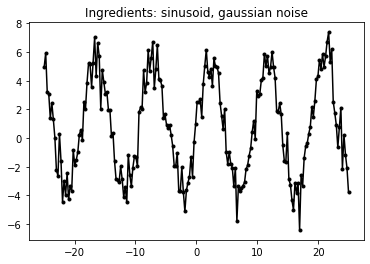

In [7]:
x = np.linspace(-25,25,200)
our_first_recipe.plot(x)
plt.show()

Alright! That was cool, but let's start again with some different ingredients and try something more ambitious

Here's a parabola, a cubic function, and some uniform white noise. You can see all their parameters in their declarations

In [8]:
ing_parabola = Ingredient(ing_funcs.parabola, "parabola", a=-2, b=0, c=3)
ing_cubic = Ingredient(ing_funcs.cubic, "cubic", a=2, b=0, c=0, d=-5)
ing_uniform = Ingredient(ing_funcs.uniform, "white noise", shift=2, scale=2)

Now add them to a recipe...

In [9]:
rec1 = Recipe()
rec1.add_ingredient(ing_parabola, mix_funcs.add)

We can combine ingredients in more ways than just adding! We'll multiply our white noise on to the parabola then plot it to see our progress

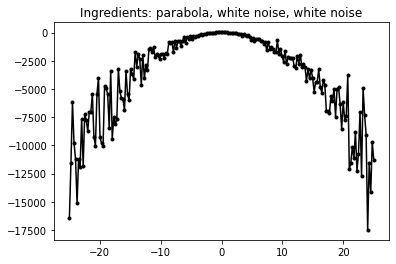

In [11]:
rec1.add_ingredient(ing_uniform, mix_funcs.multiply)
rec1.plot(x)
plt.show()

Pretty cool, but we can do better! Let's convolve in the cubic function 🤯

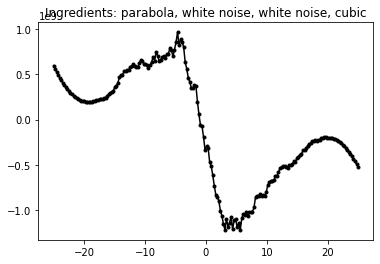

In [12]:
rec1.add_ingredient(ing_cubic, mix_funcs.convolve)
rec1.plot(x)
plt.show()

I don't know what phenomena this can model but it looks pretty cool!

Let's try to actually model something scientific...

We've built in support for creating analytical models of gravitational wave signals

In [ ]:
gw = Ingredient(ing_funcs.gw_signal, "BH-BH binary")